In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b_test = pd.read_csv('Bechdel_IMDB_Merge0524.csv')

In [3]:
print(b_test.head())

                          title  year  imdbid    id  bechdelRating  \
0                    Miss Jerry  1894     9.0  9779              0   
1  Story of the Kelly Gang, The  1906   574.0  1349              1   
2                     Cleopatra  1912  2101.0  2003              2   
3         A Florida Enchantment  1914  3973.0  4457              2   
4        Birth of a Nation, The  1915  4972.0  1258              2   

   imdbAverageRating  numVotes runtimeMinutes   genre1     genre2     genre3  
0                5.4     212.0             45  Romance        NaN        NaN  
1                6.0     903.0             70   Action  Adventure  Biography  
2                5.1     622.0            100    Drama    History        NaN  
3                5.8     300.0             63   Comedy        NaN        NaN  
4                6.1   26403.0            195    Drama    History        War  


In [4]:
print(b_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9718 entries, 0 to 9717
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              9718 non-null   object 
 1   year               9718 non-null   int64  
 2   imdbid             9718 non-null   float64
 3   id                 9718 non-null   int64  
 4   bechdelRating      9718 non-null   int64  
 5   imdbAverageRating  9718 non-null   float64
 6   numVotes           9718 non-null   float64
 7   runtimeMinutes     9718 non-null   object 
 8   genre1             9718 non-null   object 
 9   genre2             8446 non-null   object 
 10  genre3             5807 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 835.3+ KB
None


In [5]:
print(b_test['runtimeMinutes'].unique())

['45' '70' '100' '63' '195' '58' '163' '66' '78' '84' '73' '90' '85' '67'
 '79' '91' '107' '68' '150' '242' '117' '74' '128' '94' '125' '82' '65'
 '80' '87' '140' '129' '75' '59' '155' '88' '151' '77' '69' '95' '110'
 '93' '56' '112' '62' '330' '108' '72' '153' '144' '76' '98' '114' '96'
 '109' '113' '152' '97' '89' '83' '104' '99' '92' '86' '123' '64' '71'
 '60' '115' '102' '111' '105' '51' '132' '106' '101' '176' '81' '103'
 '116' '118' '133' '238' '121' '141' '119' '124' '120' '61' '130' '127'
 '122' '134' '126' '146' '177' '189' '142' '170' '139' '154' '145' '135'
 '138' '166' '171' '143' '137' '188' '131' '136' '207' '161' '175' '220'
 '208' '147' '158' '157' '212' '149' '174' '179' '197' '54' '182' '168'
 '205' '218' '178' '192' '172' '210' '47' '25' '185' '159' '162' '148'
 '164' '48' '183' '167' '193' '202' '165' '160' '219' '191' '229' '181'
 '156' '180' '271' '240' '55' '439' '52' '194' '169' '173' '224' '374'
 '201' '187' '237' '\\N' '1440' '50' '46' '319' '230' '44' '209' '

In [12]:
n_count = b_test[b_test['runtimeMinutes'] == '\\N']

In [15]:
print(n_count)

                                         title  year      imdbid     id  \
5303                  God&#39;s Forgotten Town  2008   1077084.0   1178   
5536                  Chohatsu Daikaiju Gehara  2009   3671900.0   6571   
5713                      Our Summer in Tehran  2009   1326956.0   2755   
5763  Tales from the Catholic Church of Elvis!  2009   1082876.0   6829   
8884                      Deliciosa Fruta Seca  2019   7201830.0  10411   
9311                                   Hiraeth  2021   4552196.0  10285   
9490                                House, The  2022  11703050.0  10397   
9677                                   Reflect  2023  14966324.0  10751   

      bechdelRating  imdbAverageRating  numVotes runtimeMinutes       genre1  \
5303              3                4.9     105.0             \N       Horror   
5536              0                6.9      76.0             \N       Comedy   
5713              3                8.3      35.0             \N  Documentary   
5763

In [16]:
b_test['runtimeMinutes'].replace('\\N', '0', inplace=True)

In [17]:
n_count = b_test[b_test['runtimeMinutes'] == '\\N']

In [19]:
print(b_test['runtimeMinutes'].unique())

['45' '70' '100' '63' '195' '58' '163' '66' '78' '84' '73' '90' '85' '67'
 '79' '91' '107' '68' '150' '242' '117' '74' '128' '94' '125' '82' '65'
 '80' '87' '140' '129' '75' '59' '155' '88' '151' '77' '69' '95' '110'
 '93' '56' '112' '62' '330' '108' '72' '153' '144' '76' '98' '114' '96'
 '109' '113' '152' '97' '89' '83' '104' '99' '92' '86' '123' '64' '71'
 '60' '115' '102' '111' '105' '51' '132' '106' '101' '176' '81' '103'
 '116' '118' '133' '238' '121' '141' '119' '124' '120' '61' '130' '127'
 '122' '134' '126' '146' '177' '189' '142' '170' '139' '154' '145' '135'
 '138' '166' '171' '143' '137' '188' '131' '136' '207' '161' '175' '220'
 '208' '147' '158' '157' '212' '149' '174' '179' '197' '54' '182' '168'
 '205' '218' '178' '192' '172' '210' '47' '25' '185' '159' '162' '148'
 '164' '48' '183' '167' '193' '202' '165' '160' '219' '191' '229' '181'
 '156' '180' '271' '240' '55' '439' '52' '194' '169' '173' '224' '374'
 '201' '187' '237' '0' '1440' '50' '46' '319' '230' '44' '209' '57

In [20]:
b_test['runtimeMinutes'] = pd.to_numeric(b_test['runtimeMinutes'])

In [21]:
print(b_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9718 entries, 0 to 9717
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              9718 non-null   object 
 1   year               9718 non-null   int64  
 2   imdbid             9718 non-null   float64
 3   id                 9718 non-null   int64  
 4   bechdelRating      9718 non-null   int64  
 5   imdbAverageRating  9718 non-null   float64
 6   numVotes           9718 non-null   float64
 7   runtimeMinutes     9718 non-null   int64  
 8   genre1             9718 non-null   object 
 9   genre2             8446 non-null   object 
 10  genre3             5807 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 835.3+ KB
None


In [22]:
print(b_test['genre1'].unique())

['Romance' 'Action' 'Drama' 'Comedy' 'Crime' 'Fantasy' 'Adventure'
 'Horror' 'Documentary' 'Mystery' 'Biography' 'Western' 'Film-Noir'
 'Animation' 'Thriller' 'Musical' 'Sci-Fi' 'Family' 'Adult' '\\N'
 'History' 'Music']


In [23]:
b_test['genre1'].replace('\\N', 'Unknown', inplace=True)

In [24]:
print(b_test['genre1'].unique())

['Romance' 'Action' 'Drama' 'Comedy' 'Crime' 'Fantasy' 'Adventure'
 'Horror' 'Documentary' 'Mystery' 'Biography' 'Western' 'Film-Noir'
 'Animation' 'Thriller' 'Musical' 'Sci-Fi' 'Family' 'Adult' 'Unknown'
 'History' 'Music']


In [25]:
print(b_test['genre2'].unique())

[nan 'Adventure' 'History' 'Drama' 'Romance' 'Comedy' 'Crime' 'Mystery'
 'Fantasy' 'Thriller' 'Sci-Fi' 'Horror' 'Family' 'Western' 'Animation'
 'Music' 'Musical' 'War' 'Film-Noir' 'Biography' 'Sport' 'Documentary'
 'News']


In [26]:
b_test['genre2'].fillna('Unknown', inplace=True)

In [27]:
print(b_test['genre2'].unique())

['Unknown' 'Adventure' 'History' 'Drama' 'Romance' 'Comedy' 'Crime'
 'Mystery' 'Fantasy' 'Thriller' 'Sci-Fi' 'Horror' 'Family' 'Western'
 'Animation' 'Music' 'Musical' 'War' 'Film-Noir' 'Biography' 'Sport'
 'Documentary' 'News']


In [28]:
print(b_test['genre3'].unique())

[nan 'Biography' 'War' 'Romance' 'Drama' 'Family' 'Thriller' 'Horror'
 'Fantasy' 'Western' 'Comedy' 'History' 'Mystery' 'Musical' 'Film-Noir'
 'Sport' 'Sci-Fi' 'Music' 'Crime' 'Animation' 'Documentary' 'News']


In [29]:
b_test['genre3'].fillna('Unknown', inplace=True)

In [30]:
print(b_test['genre3'].unique())

['Unknown' 'Biography' 'War' 'Romance' 'Drama' 'Family' 'Thriller'
 'Horror' 'Fantasy' 'Western' 'Comedy' 'History' 'Mystery' 'Musical'
 'Film-Noir' 'Sport' 'Sci-Fi' 'Music' 'Crime' 'Animation' 'Documentary'
 'News']


In [31]:
print(b_test.columns)

Index(['title', 'year', 'imdbid', 'id', 'bechdelRating', 'imdbAverageRating',
       'numVotes', 'runtimeMinutes', 'genre1', 'genre2', 'genre3'],
      dtype='object')


In [37]:
print(b_test.title.isna().sum())

0


In [38]:
print(b_test['bechdelRating'].unique())

[0 1 2 3]


In [39]:
print(b_test['imdbAverageRating'].unique())

[5.4 6.  5.1 5.8 6.1 6.4 7.7 5.3 6.3 6.2 6.7 6.8 6.9 7.2 8.  8.2 7.3 7.8
 7.  7.6 7.9 8.1 7.5 7.1 6.5 8.3 6.6 7.4 5.6 4.6 5.9 8.5 5.7 4.3 3.7 3.4
 4.8 5.5 8.4 5.2 8.6 3.6 3.9 4.2 2.7 4.1 3.8 4.4 4.9 9.  4.5 2.3 4.7 1.9
 8.8 1.6 5.  2.5 9.2 4.  8.7 3.5 2.2 3.2 3.  3.3 8.9 9.3 1.2 1.5 2.4 1.8
 2.6 2.1 3.1 1.7 2.8 1.4 1.3 2.9]


DATA ANALYSIS

In [63]:
bechdel_vs_imdbavg_rating = b_test[['bechdelRating', 'imdbAverageRating']]

In [66]:
bvi_rating0 = bechdel_vs_imdbavg_rating[bechdel_vs_imdbavg_rating['bechdelRating'] == 0]
bvi_rating1 = bechdel_vs_imdbavg_rating[bechdel_vs_imdbavg_rating['bechdelRating'] == 1]
bvi_rating2 = bechdel_vs_imdbavg_rating[bechdel_vs_imdbavg_rating['bechdelRating'] == 2]
bvi_rating3 = bechdel_vs_imdbavg_rating[bechdel_vs_imdbavg_rating['bechdelRating'] == 3]

In [70]:
print(bvi_rating3['imdbAverageRating'].mean())

6.47529453766512


In [71]:
bechdel_avgi = pd.DataFrame([
    [0, bvi_rating0['imdbAverageRating'].mean()],
    [1, bvi_rating1['imdbAverageRating'].mean()],
    [2, bvi_rating2['imdbAverageRating'].mean()],
    [3, bvi_rating3['imdbAverageRating'].mean()]],
    columns = ['bechdel_rating', 'average_imdb_rating'])

In [72]:
print(bechdel_avgi)

   bechdel_rating  average_imdb_rating
0               0             6.725326
1               1             6.677105
2               2             6.609961
3               3             6.475295


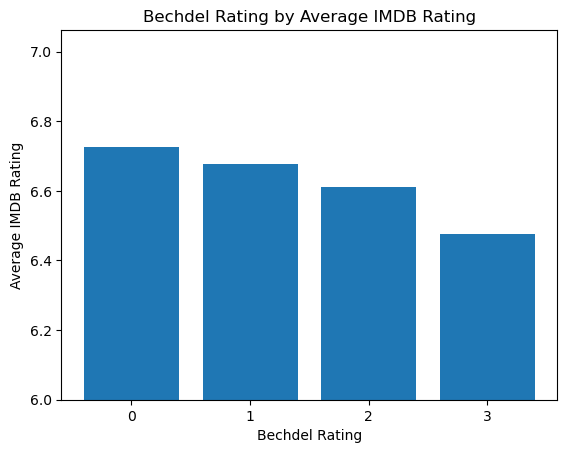

In [86]:
ax1 = plt.subplot()
plt.bar(bechdel_avgi['bechdel_rating'], bechdel_avgi['average_imdb_rating'])
plt.title('Bechdel Rating by Average IMDB Rating')
plt.ylim(bottom = 6)
ax1.set_xticks([i for i in range(4)])
plt.xlabel("Bechdel Rating")
plt.ylabel('Average IMDB Rating')
plt.show()

In [95]:
bechdel_overtime = b_test.groupby('year')['bechdelRating'].mean().reset_index()

In [96]:
print(bechdel_overtime)

     year  bechdelRating
0    1894       0.000000
1    1906       1.000000
2    1912       2.000000
3    1914       2.000000
4    1915       2.000000
..    ...            ...
109  2020       2.500000
110  2021       2.404624
111  2022       2.448276
112  2023       2.449153
113  2024       2.666667

[114 rows x 2 columns]


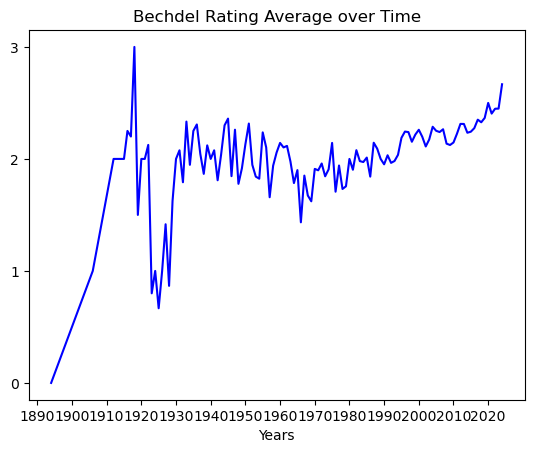

In [111]:
plt.plot(bechdel_overtime['year'], bechdel_overtime['bechdelRating'], linestyle='solid', color='blue')
plt.yticks([i for i in range(4)])
plt.xticks([i for i in range(1890, 2030, 10)])
plt.title("Bechdel Rating Average over Time")
plt.xlabel("Years")
plt.show()

In [109]:
num_movies_bybechdel = b_test.groupby('bechdelRating').title.count().reset_index()

In [110]:
print(num_movies_bybechdel)

   bechdelRating  title
0              0    920
1              1   2162
2              2   1034
3              3   5602


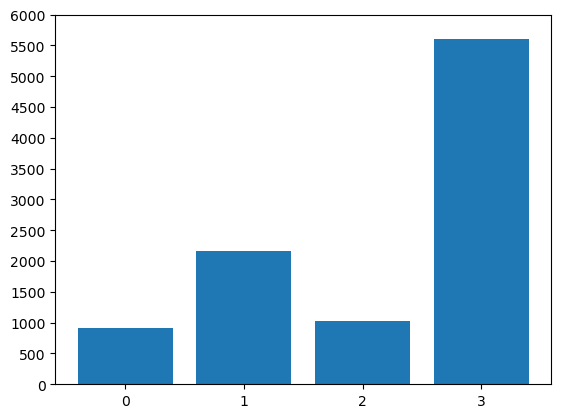

In [114]:
plt.bar(num_movies_bybechdel['bechdelRating'], num_movies_bybechdel['title'])
plt.xticks([i for i in range(4)])
plt.yticks([i for i in range(0, 6001, 500)])
plt.show()

In [117]:
b_3rating = b_test[b_test['bechdelRating'] == 3]
b_3rating_bygenre = b_3rating.groupby('genre1').title.count().reset_index()

In [129]:
b_3rating_bygenre.sort_values(by='title', ignore_index=True, ascending=False, inplace=True)

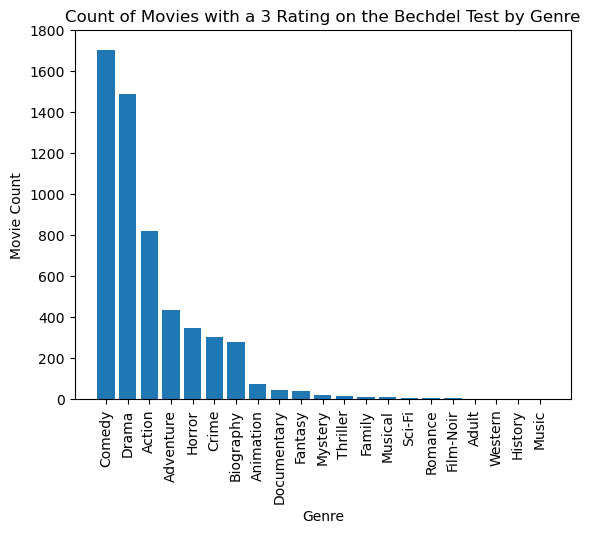

<Figure size 640x480 with 0 Axes>

In [138]:
ax1 = plt.subplot()
ax1.bar(b_3rating_bygenre.genre1, b_3rating_bygenre.title)
ax1.set_xticks([i for i in range(len(b_3rating_bygenre.genre1))])
ax1.set_xticklabels([str(i) for i in b_3rating_bygenre.genre1], rotation = 90)
ax1.set_yticks([i for i in range(0, 1801, 200)])
plt.title('Count of Movies with a 3 Rating on the Bechdel Test by Genre')
plt.xlabel('Genre')
plt.ylabel('Movie Count')
plt.show()
plt.clf()

In [160]:
def bechdel_count_byrating(DataFrame):
    rating_counts_dict = {}
    ratings = [0, 1, 2, 3]
    for rating in ratings:
        rating_df = DataFrame[DataFrame['bechdelRating'] == rating]
        rating_counts = rating_df.groupby('genre1').title.count().reset_index()
        rating_counts.sort_values(by='title', inplace=True, ignore_index=True, ascending=False)
        rating_counts_dict[rating] = (rating_counts)
    for rating, count_df in rating_counts_dict.items():
        plt.bar(count_df.genre1, count_df.title)
        plt.xticks([i for i in range(len(count_df.genre1))], labels=[str(i) for i in count_df.genre1], rotation = 90)
        plt.title("Count of Movies with Bechdel Rating" + str(rating) + " by Genre")
        plt.xlabel("Genre")
        plt.ylabel("Movie Counts")
        plt.show()

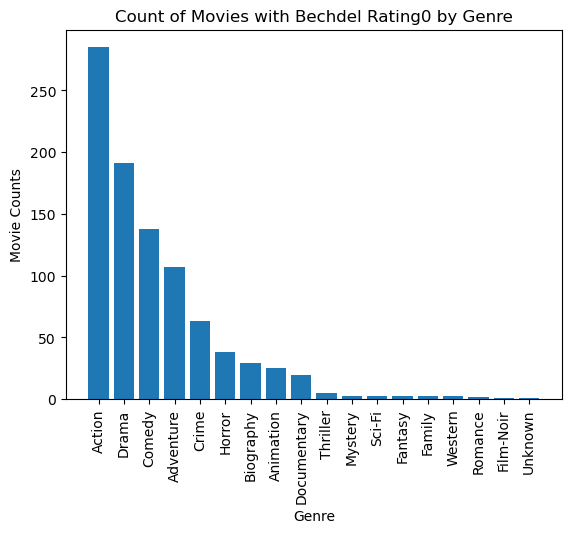

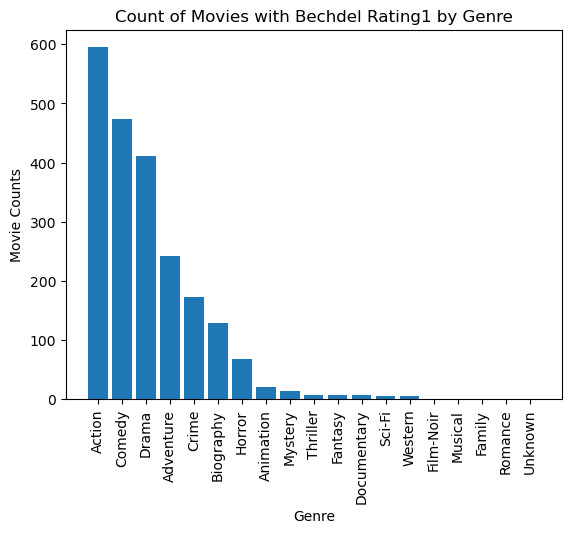

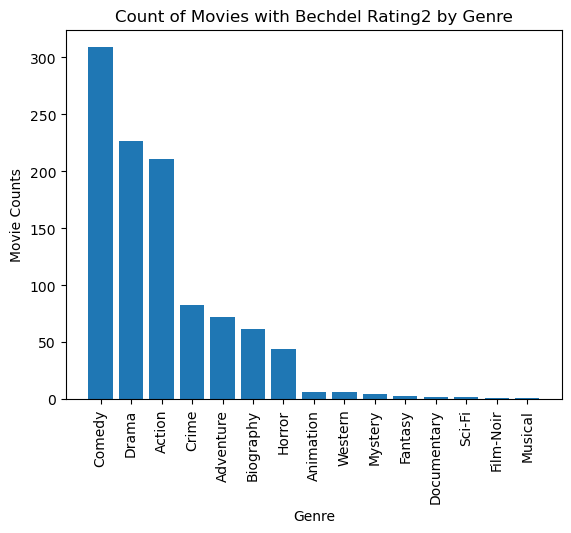

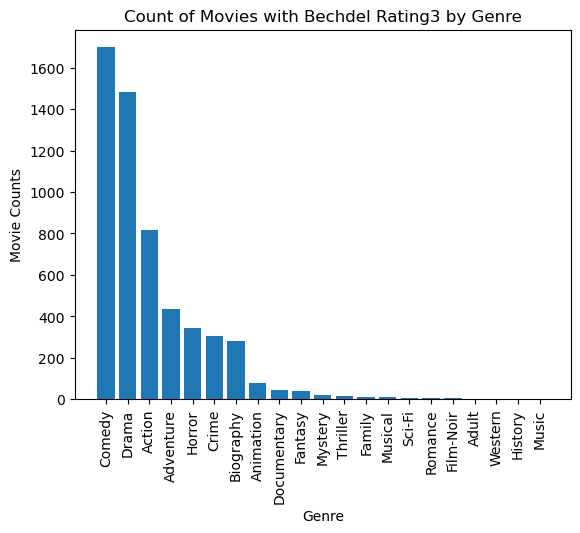

In [161]:
bechdel_count_byrating(b_test)

In [163]:
imdb_overtime = b_test.groupby('year')['imdbAverageRating'].mean().reset_index()

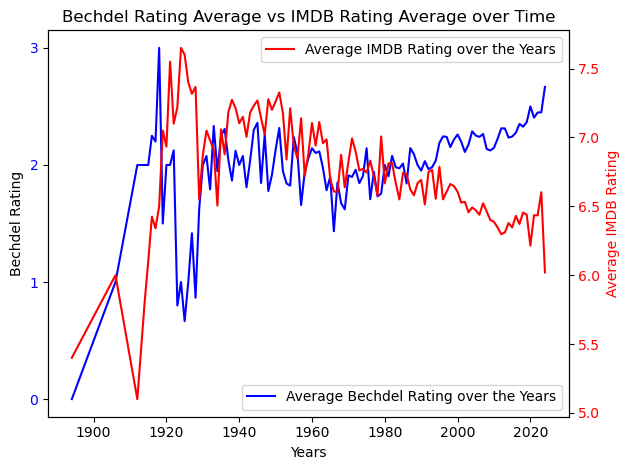

In [174]:
fig, ax1 = plt.subplots()
plt.title("Bechdel Rating Average vs IMDB Rating Average over Time")
ax1.set_xlabel('Years')
ax1.set_ylabel('Bechdel Rating')
ax1.set_yticks([i for i in range(4)])
ax1.plot(bechdel_overtime['year'], bechdel_overtime['bechdelRating'], linestyle='solid', color='blue', label='Average Bechdel Rating over the Years')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc = 4)

ax2 = ax1.twinx()
ax2.set_ylabel('Average IMDB Rating', color='Red')
ax2.plot(imdb_overtime['year'], imdb_overtime['imdbAverageRating'], label='Average IMDB Rating over the Years', color='Red')
ax2.tick_params(axis='y', labelcolor='Red')
ax2.legend(loc=1)

fig.tight_layout()
plt.show()


In [171]:
print(b_test['genre1'].unique())

['Romance' 'Action' 'Drama' 'Comedy' 'Crime' 'Fantasy' 'Adventure'
 'Horror' 'Documentary' 'Mystery' 'Biography' 'Western' 'Film-Noir'
 'Animation' 'Thriller' 'Musical' 'Sci-Fi' 'Family' 'Adult' 'Unknown'
 'History' 'Music']


In [204]:
def avg_rating_bygenre_overtime(DataFrame):
    dataframes_dict = {}
    for genre in b_test['genre1'].unique():
        genre_df = DataFrame[DataFrame['genre1'] == genre]
        genre_df_overtime = genre_df.groupby('year')['bechdelRating'].mean().reset_index()
        dataframes_dict[genre] = genre_df_overtime
    for genre, df in dataframes_dict.items():
        plt.plot(df['year'], df['bechdelRating'])
        plt.title('Average Bechdel Rating in ' + str(genre) + ' Over the Years')
        plt.xlabel('Year')
        plt.ylabel('Average Bechdel Rating')
        plt.yticks([0, 1, 2, 3])
        plt.xticks([i for i in range(df['year'].min(), df['year'].max()+1, 20)])
        plt.show()

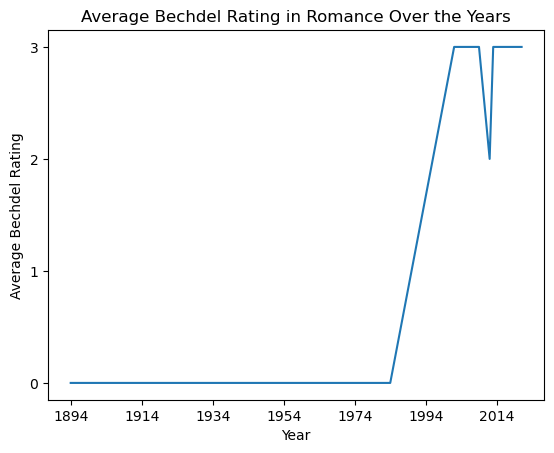

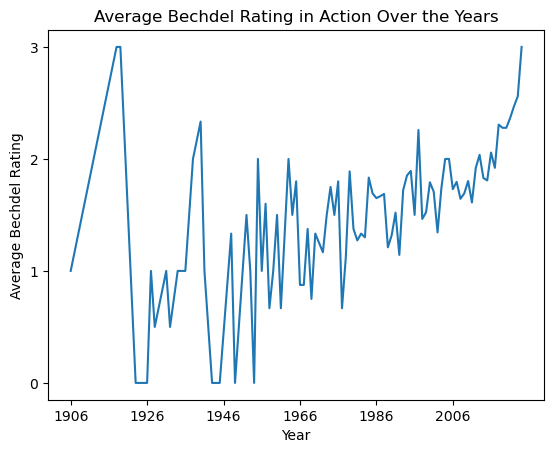

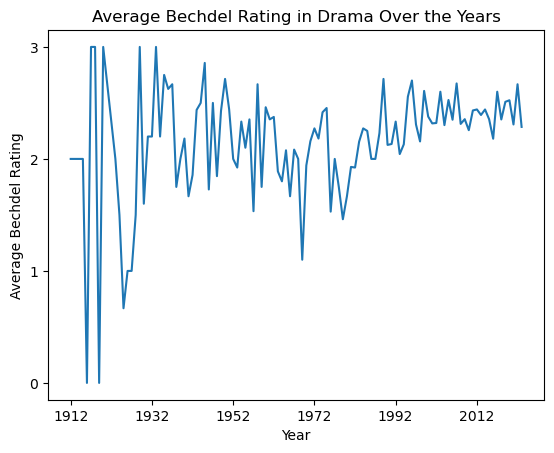

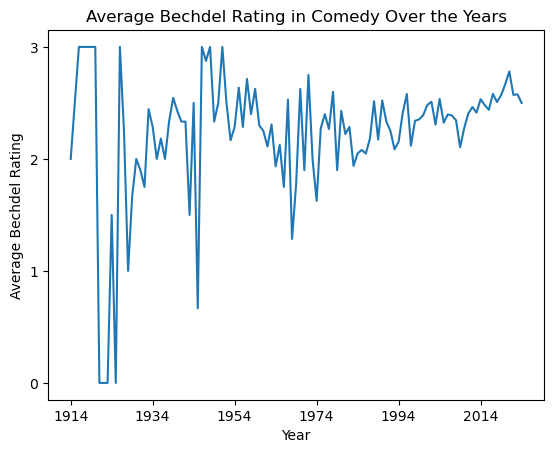

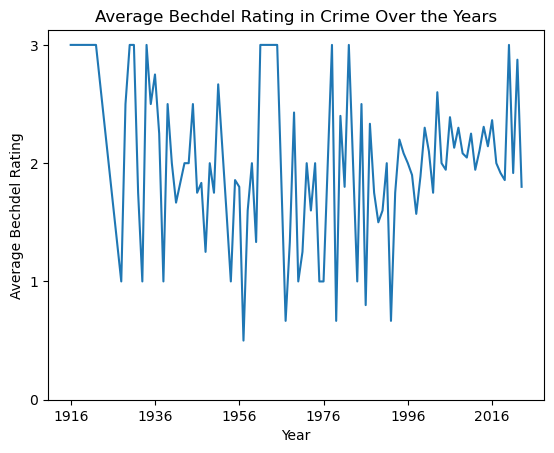

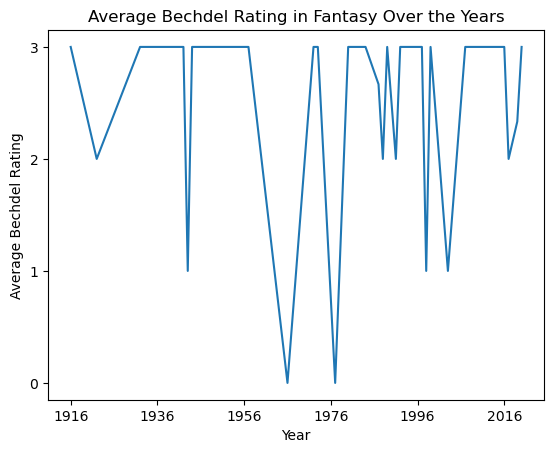

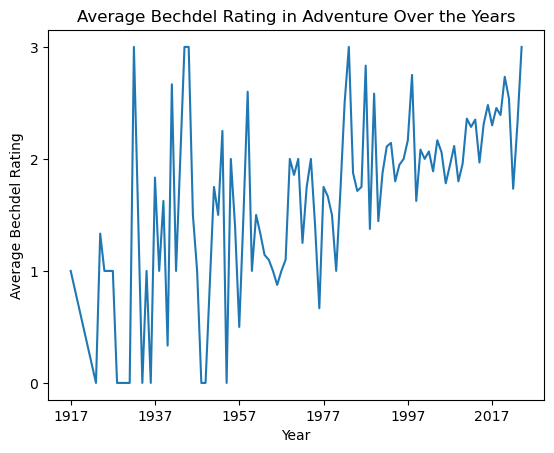

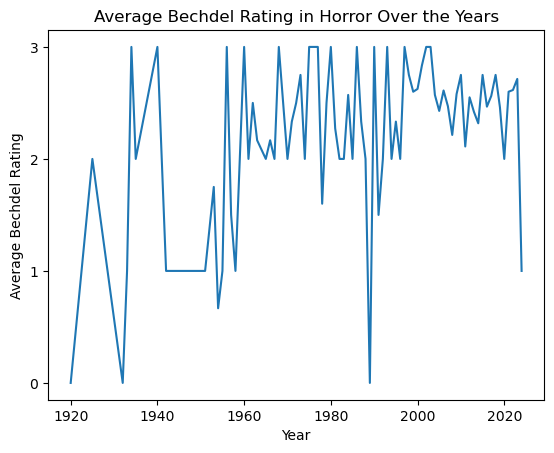

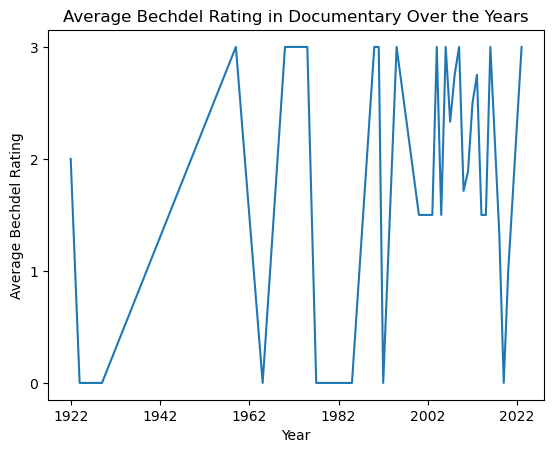

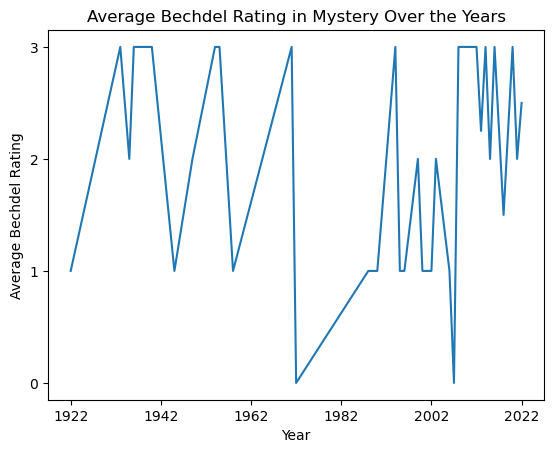

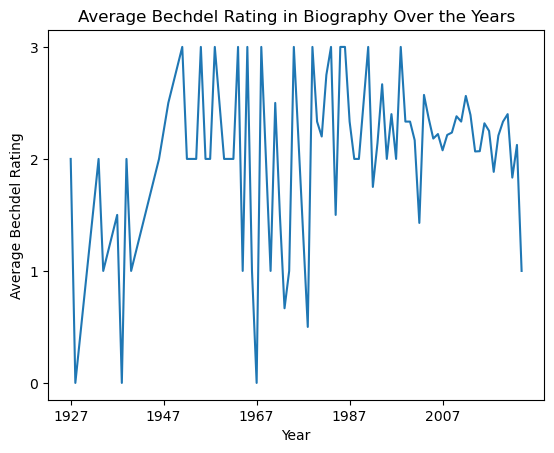

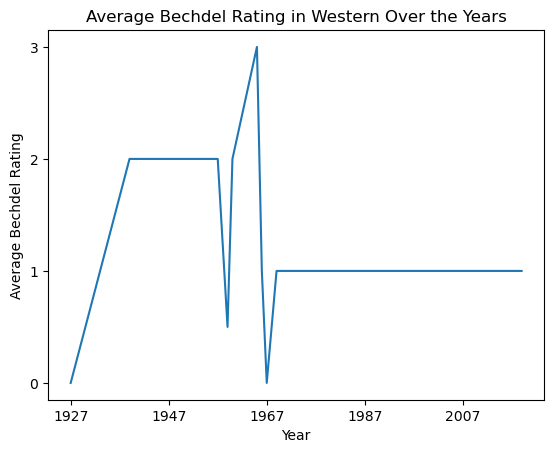

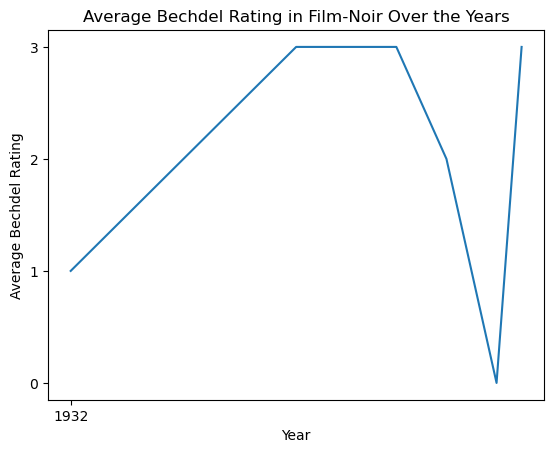

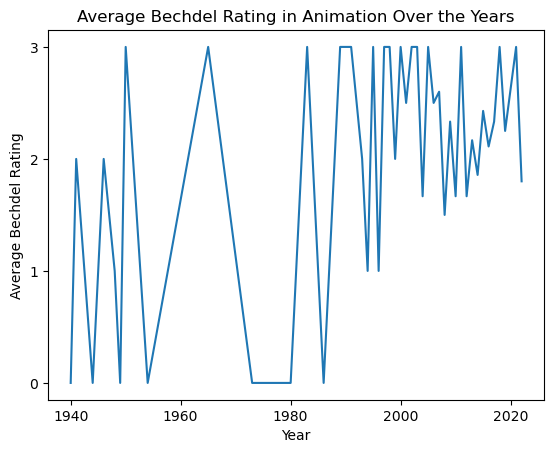

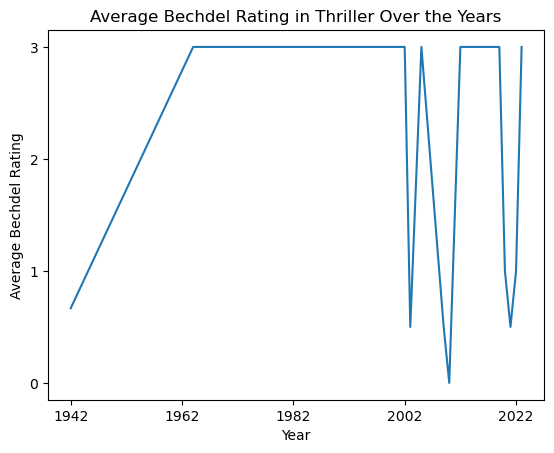

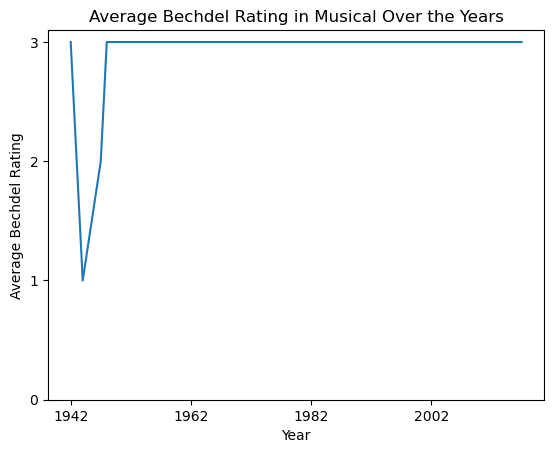

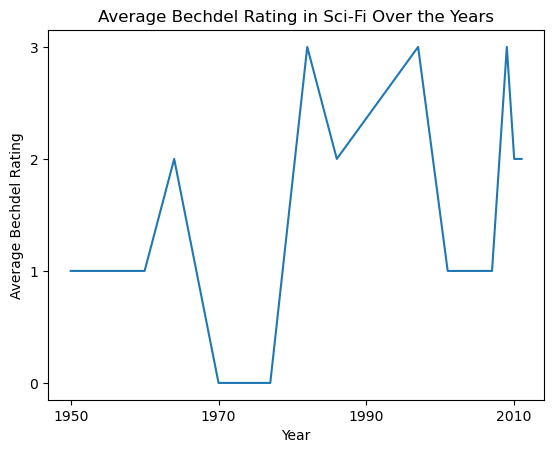

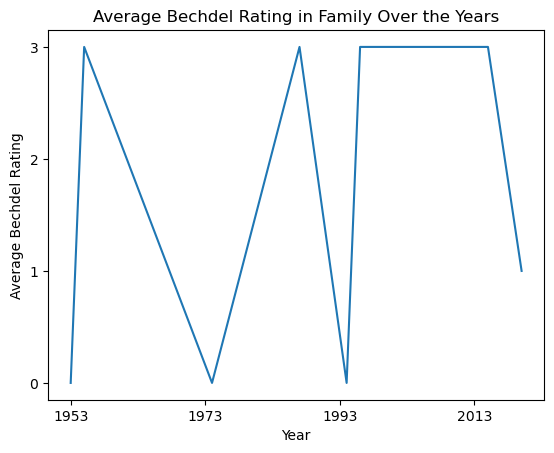

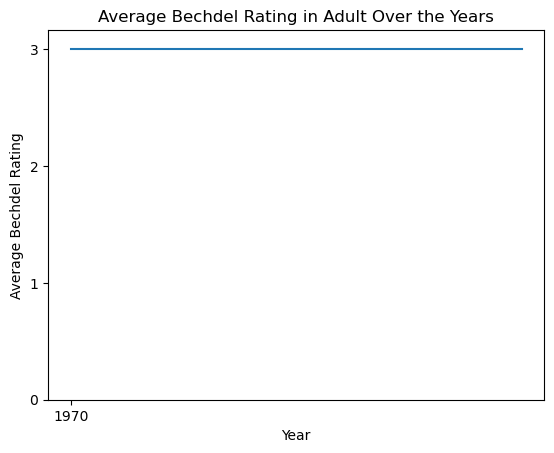

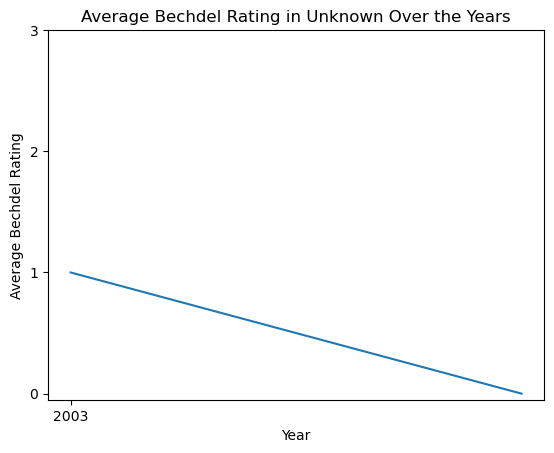

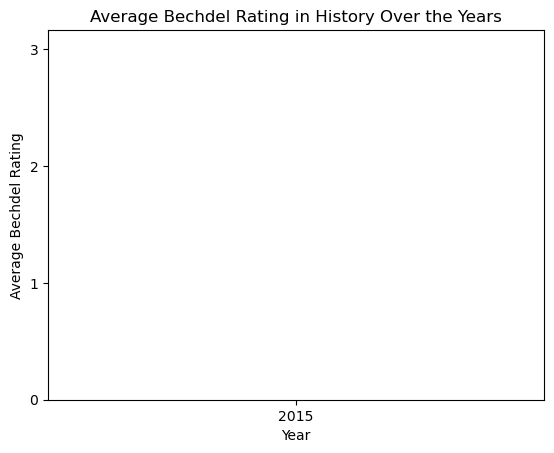

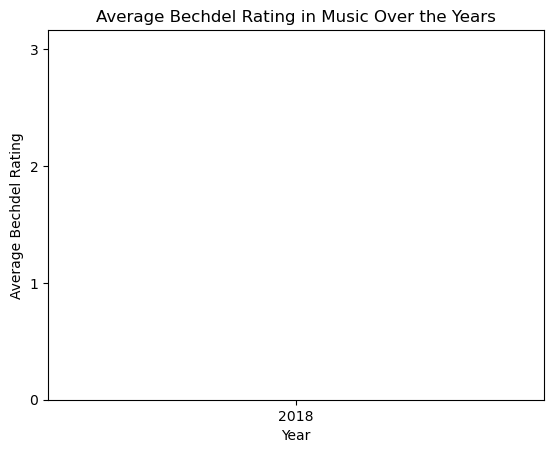

In [205]:
avg_rating_bygenre_overtime(b_test)